This notebook is for graph generations of misc pictures needed.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [8]:
plt.style.use('fivethirtyeight')

In [9]:
def grab_river_data(url, name):
    file_name = "%s.txt" % name
    resp = requests.get(url)
    with open(file_name, 'w') as f:
        f.write(resp.text)
        
    df = pd.read_csv(file_name, delimiter='\t', usecols=[2,4], names=['time', 'discharge'], header=1, comment='#')
    return df

In [10]:
freemont = grab_river_data('https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00060=on&format=rdb&site_no=09330000&period=&begin_date=2000-02-01&end_date=2018-02-19', 'freemont')
freemont.time = pd.to_datetime(freemont.time)

In [11]:
freemont

,time,discharge
0,2000-02-01 00:00:00,101.0
1,2000-02-01 00:15:00,102.0
2,2000-02-01 00:30:00,101.0
3,2000-02-01 00:45:00,101.0
4,2000-02-01 01:00:00,101.0
5,2000-02-01 01:15:00,101.0
6,2000-02-01 01:30:00,101.0
7,2000-02-01 01:45:00,102.0
8,2000-02-01 02:00:00,101.0
9,2000-02-01 02:15:00,102.0


In [24]:
dirty_devil = grab_river_data('https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00060=on&format=rdb&site_no=09333500&period=&begin_date=2000-02-01&end_date=2018-02-19', 'dirty_devil')
dirty_devil.time = pd.to_datetime(dirty_devil.time)

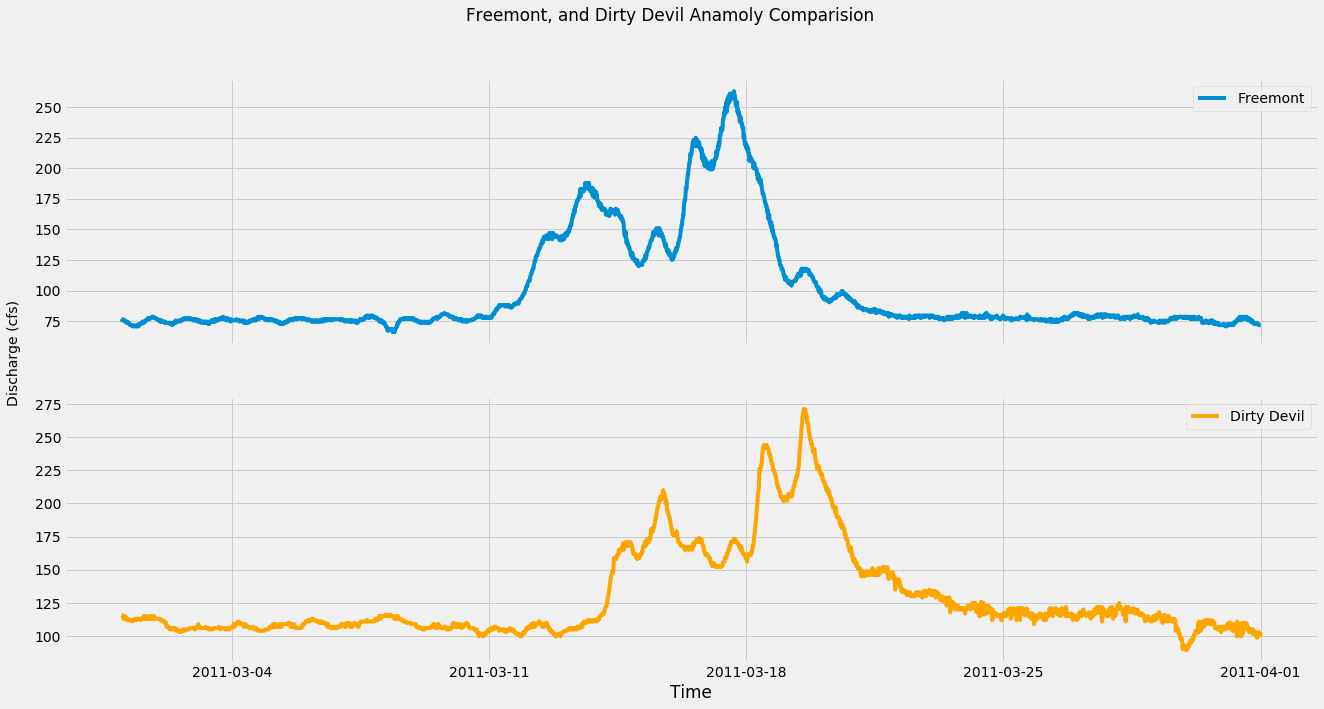

In [56]:
subset2 = dirty_devil[dirty_devil.time.between('2011-03', '2011-04')]
fig, axs = plt.subplots(2, 1, sharex=True)
fig.suptitle('Freemont, and Dirty Devil Anamoly Comparision')
plt.xlabel("Time")
fig.set_figheight(10)
fig.set_figwidth(20)
axs[0].plot(subset.time, subset.discharge, label='Freemont')
axs[1].plot(subset2.time, subset2.discharge, label='Dirty Devil', c='orange')
axs[0].legend()
axs[1].legend()
plt.savefig('graphics/anomoly_comparision.png')
fig.text(0.04, 0.5, 'Discharge (cfs)', va='center', rotation='vertical')
plt.show()

In [17]:
subset = freemont[freemont.time.between('2011-03', '2011-04')]

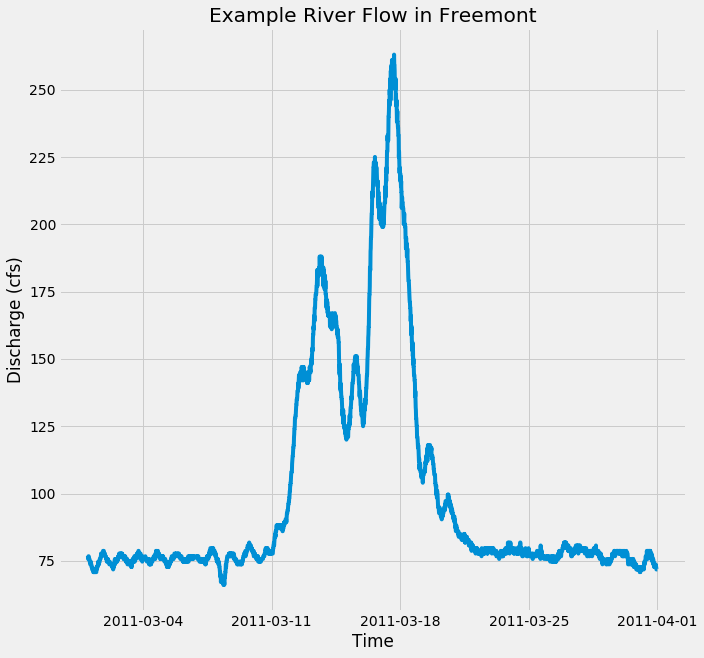

In [23]:
plt.figure(figsize=(10,10))
plt.plot(subset.time, subset.discharge)
plt.title("Example River Flow in Freemont")
plt.xlabel("Time")
plt.ylabel("Discharge (cfs)")
plt.savefig('graphics/example_freemont_flow.png')
plt.show()